# <center>Homework Assignment 7: Classification</center>
## <center>31st October 2024</center>
#### <center>Syed Asghar Abbas Zaidi 07201 in CS/CE 457/464-L1</center>
#### <center>sz07201@st.habib.edu.pk</center>

## Importing Libraries

In [26]:
import pandas as pd
from sklearn import tree #Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [27]:
df_ad = pd.read_csv('Admission_Chance_Classification.csv')
df_bor = pd.read_csv('burger-king-menu-2.csv')

# Classification using Admission_Chance_Classification.csv 

In [29]:
df_ad.head()

GRE_Score  TOEFL_Score  University_Rating   SOP  LOR   CGPA Research Admit
0        337          118                  4   4.5   4.5  9.65      YES   YES
1        324          107                  4   4.0   4.5  8.87      YES   YES
2        316          104                  3   3.0   3.5  8.00      YES   YES
3        322          110                  3   3.5   2.5  8.67      YES   YES
4        314          103                  2   2.0   3.0  8.21       NO   YES

In [30]:
df_ad.shape

(400, 8)

#### Create a train and test set. Consider Admit column as class/label column (Y) and use rest of the columns as inputs (X). Use 30% (test_size=0.3) records for test set. Use the same train and test set for all your analysis with different classifiers.

In [32]:
X_ad = df_ad.drop(['Admit'],axis=1)
Y_ad = df_ad['Admit']

In [33]:
X_ad.head()

GRE_Score  TOEFL_Score  University_Rating   SOP  LOR   CGPA Research
0        337          118                  4   4.5   4.5  9.65      YES
1        324          107                  4   4.0   4.5  8.87      YES
2        316          104                  3   3.0   3.5  8.00      YES
3        322          110                  3   3.5   2.5  8.67      YES
4        314          103                  2   2.0   3.0  8.21       NO

In [34]:
Y_ad.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: Admit, dtype: object

#### 2. In your code, set the seed after you read the data. This will keep your data and calculation consistent throughout the analysis irrespective of multiple runs. See the example code for the class random_state=99 

In [36]:
dt = tree.DecisionTreeClassifier(random_state=99)

## 3. Create a classification model to predict Admit status using Decision Tree. Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important. 
#### 3.1. Create a classification model to predict Admit status using Decision Tree.

In [38]:
X_ad.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
 SOP                 float64
LOR                  float64
CGPA                 float64
Research              object
dtype: object

In [39]:
##It takes the X_ad dataframe and converts the categorical column 'Research' into one-hot encoded columns.
X_ad = pd.get_dummies(X_ad, columns = ['Research'], dtype=int)

In [40]:
X_ad.head()

GRE_Score  TOEFL_Score  University_Rating   SOP  LOR   CGPA  Research_NO  \
0        337          118                  4   4.5   4.5  9.65            0   
1        324          107                  4   4.0   4.5  8.87            0   
2        316          104                  3   3.0   3.5  8.00            0   
3        322          110                  3   3.5   2.5  8.67            0   
4        314          103                  2   2.0   3.0  8.21            1   

   Research_YES  
0             1  
1             1  
2             1  
3             1  
4             0

In [41]:
X_ad_train, X_ad_test, y_ad_train, y_ad_test = train_test_split(X_ad, Y_ad, test_size=0.3, random_state=99)

In [42]:
X_ad_train.head()

GRE_Score  TOEFL_Score  University_Rating   SOP  LOR   CGPA  Research_NO  \
376        297           96                  2   2.5   2.0  7.43            1   
171        334          117                  5   4.0   4.5  9.07            0   
115        310          106                  4   4.5   4.5  9.04            0   
24         336          119                  5   4.0   3.5  9.80            0   
43         332          117                  4   4.5   4.0  9.10            1   

     Research_YES  
376             0  
171             1  
115             1  
24              1  
43              0

In [43]:
X_ad_train.shape

(280, 8)

The above output makes sense considering that we set the "Test_size" to 0.3, meaning 70% of the data will be used for training while the rest will be used for testing. The 70% of 400 rows is 280, so the above answer makes sense that the training input data is 280 

In [45]:
y_ad_train

376     NO
171    YES
115    YES
24     YES
43     YES
      ... 
201    YES
168    YES
185    YES
35     YES
129    YES
Name: Admit, Length: 280, dtype: object

In [46]:
y_ad_train.shape

(280,)

In [47]:
dtmodel_ad = dt.fit(X_ad_train, y_ad_train) # training the model, training the classifier

In [48]:
train_ad_pred = dtmodel_ad.predict(X_ad_train)

In [49]:
train_ad_pred

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
     

#### As a rule of thumb, we evaluate both the training and testing accuracy to validate the model. Usually training set accuracy is higher than testing set accuracy because we expose our training set output (Y) to model during training 

In [51]:
## train_pred is the prediction generated by model (predicted) and y_train is called the actual value/true value (coming from original dataset)
acc = accuracy_score(train_ad_pred, y_ad_train)
acc*100

100.0

In [52]:
test_ad_pred = dtmodel_ad.predict(X_ad_test)

In [53]:
test_ad_pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES'],
      dtype=object)

In [54]:
acc = accuracy_score(test_ad_pred, y_ad_test)
acc*100

89.16666666666667

### We observe overfitting above because training accuracy is very high and testing accuracy is low. Lets see the tree if it is complex or not. Lets see the tree if it is complex or not.
#### 3. Create a classification model to predict Admit status using Decision Tree. Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important. 

In [56]:
text_representation = export_text(dtmodel_ad, feature_names=list(X_ad.columns))
print(text_representation)

|--- CGPA <= 7.85
|   |--- LOR  <= 2.75
|   |   |--- GRE_Score <= 301.50
|   |   |   |--- class: NO
|   |   |--- GRE_Score >  301.50
|   |   |   |--- CGPA <= 7.57
|   |   |   |   |--- GRE_Score <= 313.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- GRE_Score >  313.50
|   |   |   |   |   |--- class: NO
|   |   |   |--- CGPA >  7.57
|   |   |   |   |--- University_Rating <= 1.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- University_Rating >  1.50
|   |   |   |   |   |--- class: NO
|   |--- LOR  >  2.75
|   |   |---  SOP <= 3.50
|   |   |   |--- class: YES
|   |   |---  SOP >  3.50
|   |   |   |--- class: NO
|--- CGPA >  7.85
|   |--- LOR  <= 1.75
|   |   |--- Research_YES <= 0.50
|   |   |   |--- class: NO
|   |   |--- Research_YES >  0.50
|   |   |   |--- class: YES
|   |--- LOR  >  1.75
|   |   |--- CGPA <= 8.31
|   |   |   |--- CGPA <= 8.29
|   |   |   |   |--- TOEFL_Score <= 109.50
|   |   |   |   |   |--- TOEFL_Score <= 105.50
|   |   |   |   |   |   |--- 

#### 3.2 Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important. 

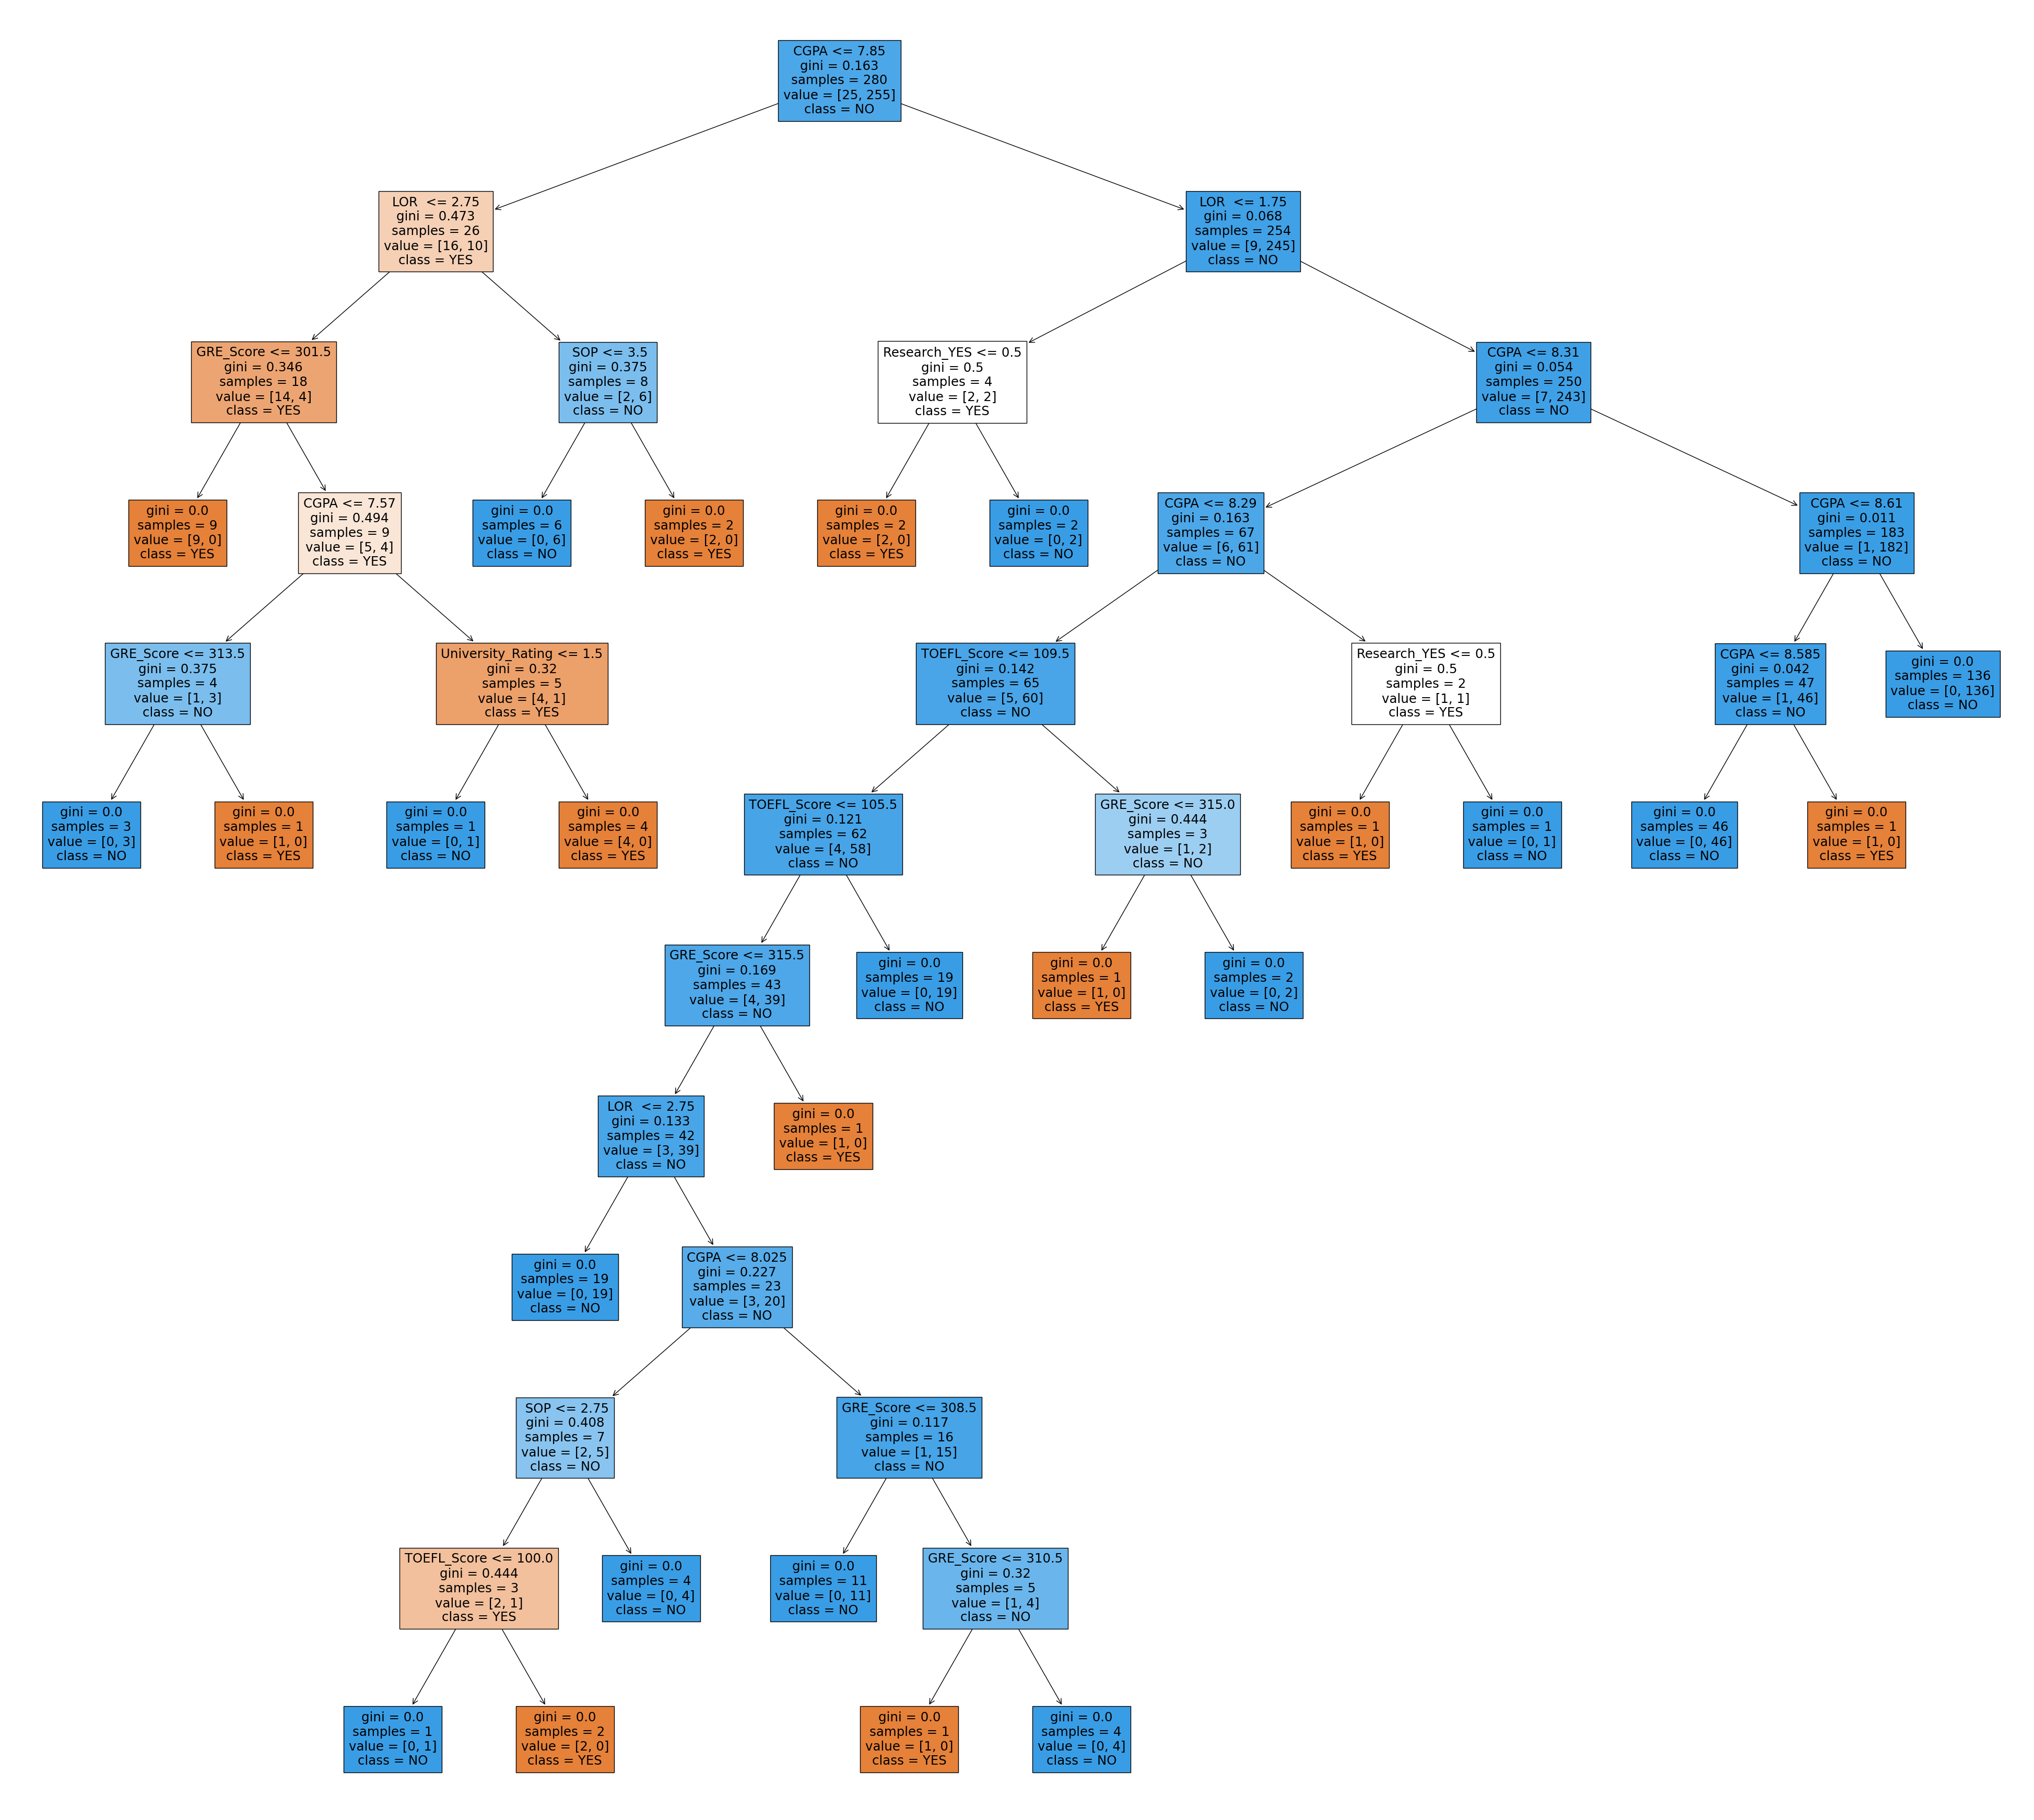

In [58]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel_ad, 
                   feature_names=list(X_ad.columns),  
                   class_names=Y_ad.value_counts().index,
                   filled=True)

### INTERPRETATION
CGPA is the most important and significant column while predicting the Admit. 
University_Rating attribute that appears in tree depth 4 is pretty less significant and less important

Key factors like CGPA, LOR, GRE, and TOEFL scores are essential indicators of academic and language proficiency, making them primary predictors of admission outcomes. Research experience also adds value, especially for higher CGPA applicants. Conversely, SOP and University Rating have a more limited impact, typically providing additional insight rather than acting as standalone determinants

In [60]:
# Using entropy as criteria to choose best feature for tree as a root. Guinea Index is used as default m
dt_ad = tree.DecisionTreeClassifier(criterion='entropy',random_state=99)
dtmodel_ad2 = dt_ad.fit(X_ad_train, y_ad_train)

train_pred2 = dtmodel_ad2.predict(X_ad_train)
acc = accuracy_score(train_pred2, y_ad_train)

test_pred2 = dtmodel_ad2.predict(X_ad_test)
acc2 = accuracy_score(test_pred2, y_ad_test)
[acc*100, acc2*100]

[100.0, 86.66666666666667]

Meaning "entropy" might be a less suitable choice to decide the important attribute as the accuracy of the model falls from around 89 Percent

#### Very high training set accuracy is a sign of Model Overfitting (see lecture notes). It means model focused too much on training set that it fails to generalize the relationship for test set (unknow or new data)

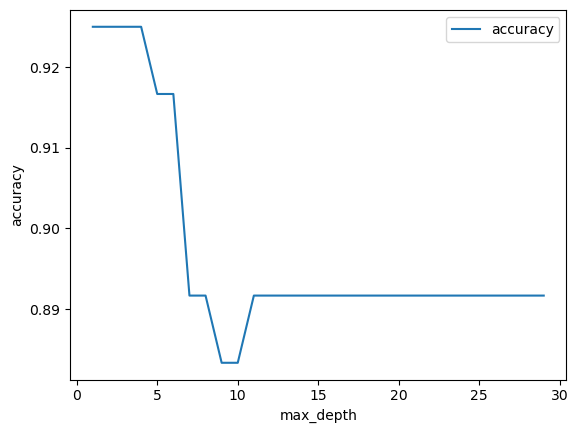

In [62]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=100)
    dtree.fit(X_ad_train, y_ad_train)
    pred = dtree.predict(X_ad_test)
    acc.append(accuracy_score(y_ad_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [63]:
acc

[0.925,
 0.925,
 0.925,
 0.925,
 0.9166666666666666,
 0.9166666666666666,
 0.8916666666666667,
 0.8916666666666667,
 0.8833333333333333,
 0.8833333333333333,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667,
 0.8916666666666667]

In [64]:
# Pruned Model
dt_ad_pruned = tree.DecisionTreeClassifier(max_depth=3,random_state=99) ##defining model
dtmodel_ad_pruned = dt_ad_pruned.fit(X_ad_train, y_ad_train)
train_ad_pred = dtmodel_ad_pruned.predict(X_ad_train)
acc = accuracy_score(train_ad_pred, y_ad_train)

test_ad_pred_test = dtmodel_ad_pruned.predict(X_ad_test) ##using
acc2 = accuracy_score(test_ad_pred, y_ad_test)
[acc*100, acc2*100]

[96.07142857142857, 89.16666666666667]

As can be observed, Pruning helped increase the accuracy on test data as it went from 89% to 93%! ALthough the accuracy on training data decreased abit, but that's okay cause we want to make better predictions on an unknown coming data, don't want to over-fit, and achieve a nice balance between accuracy on training and testing data. 

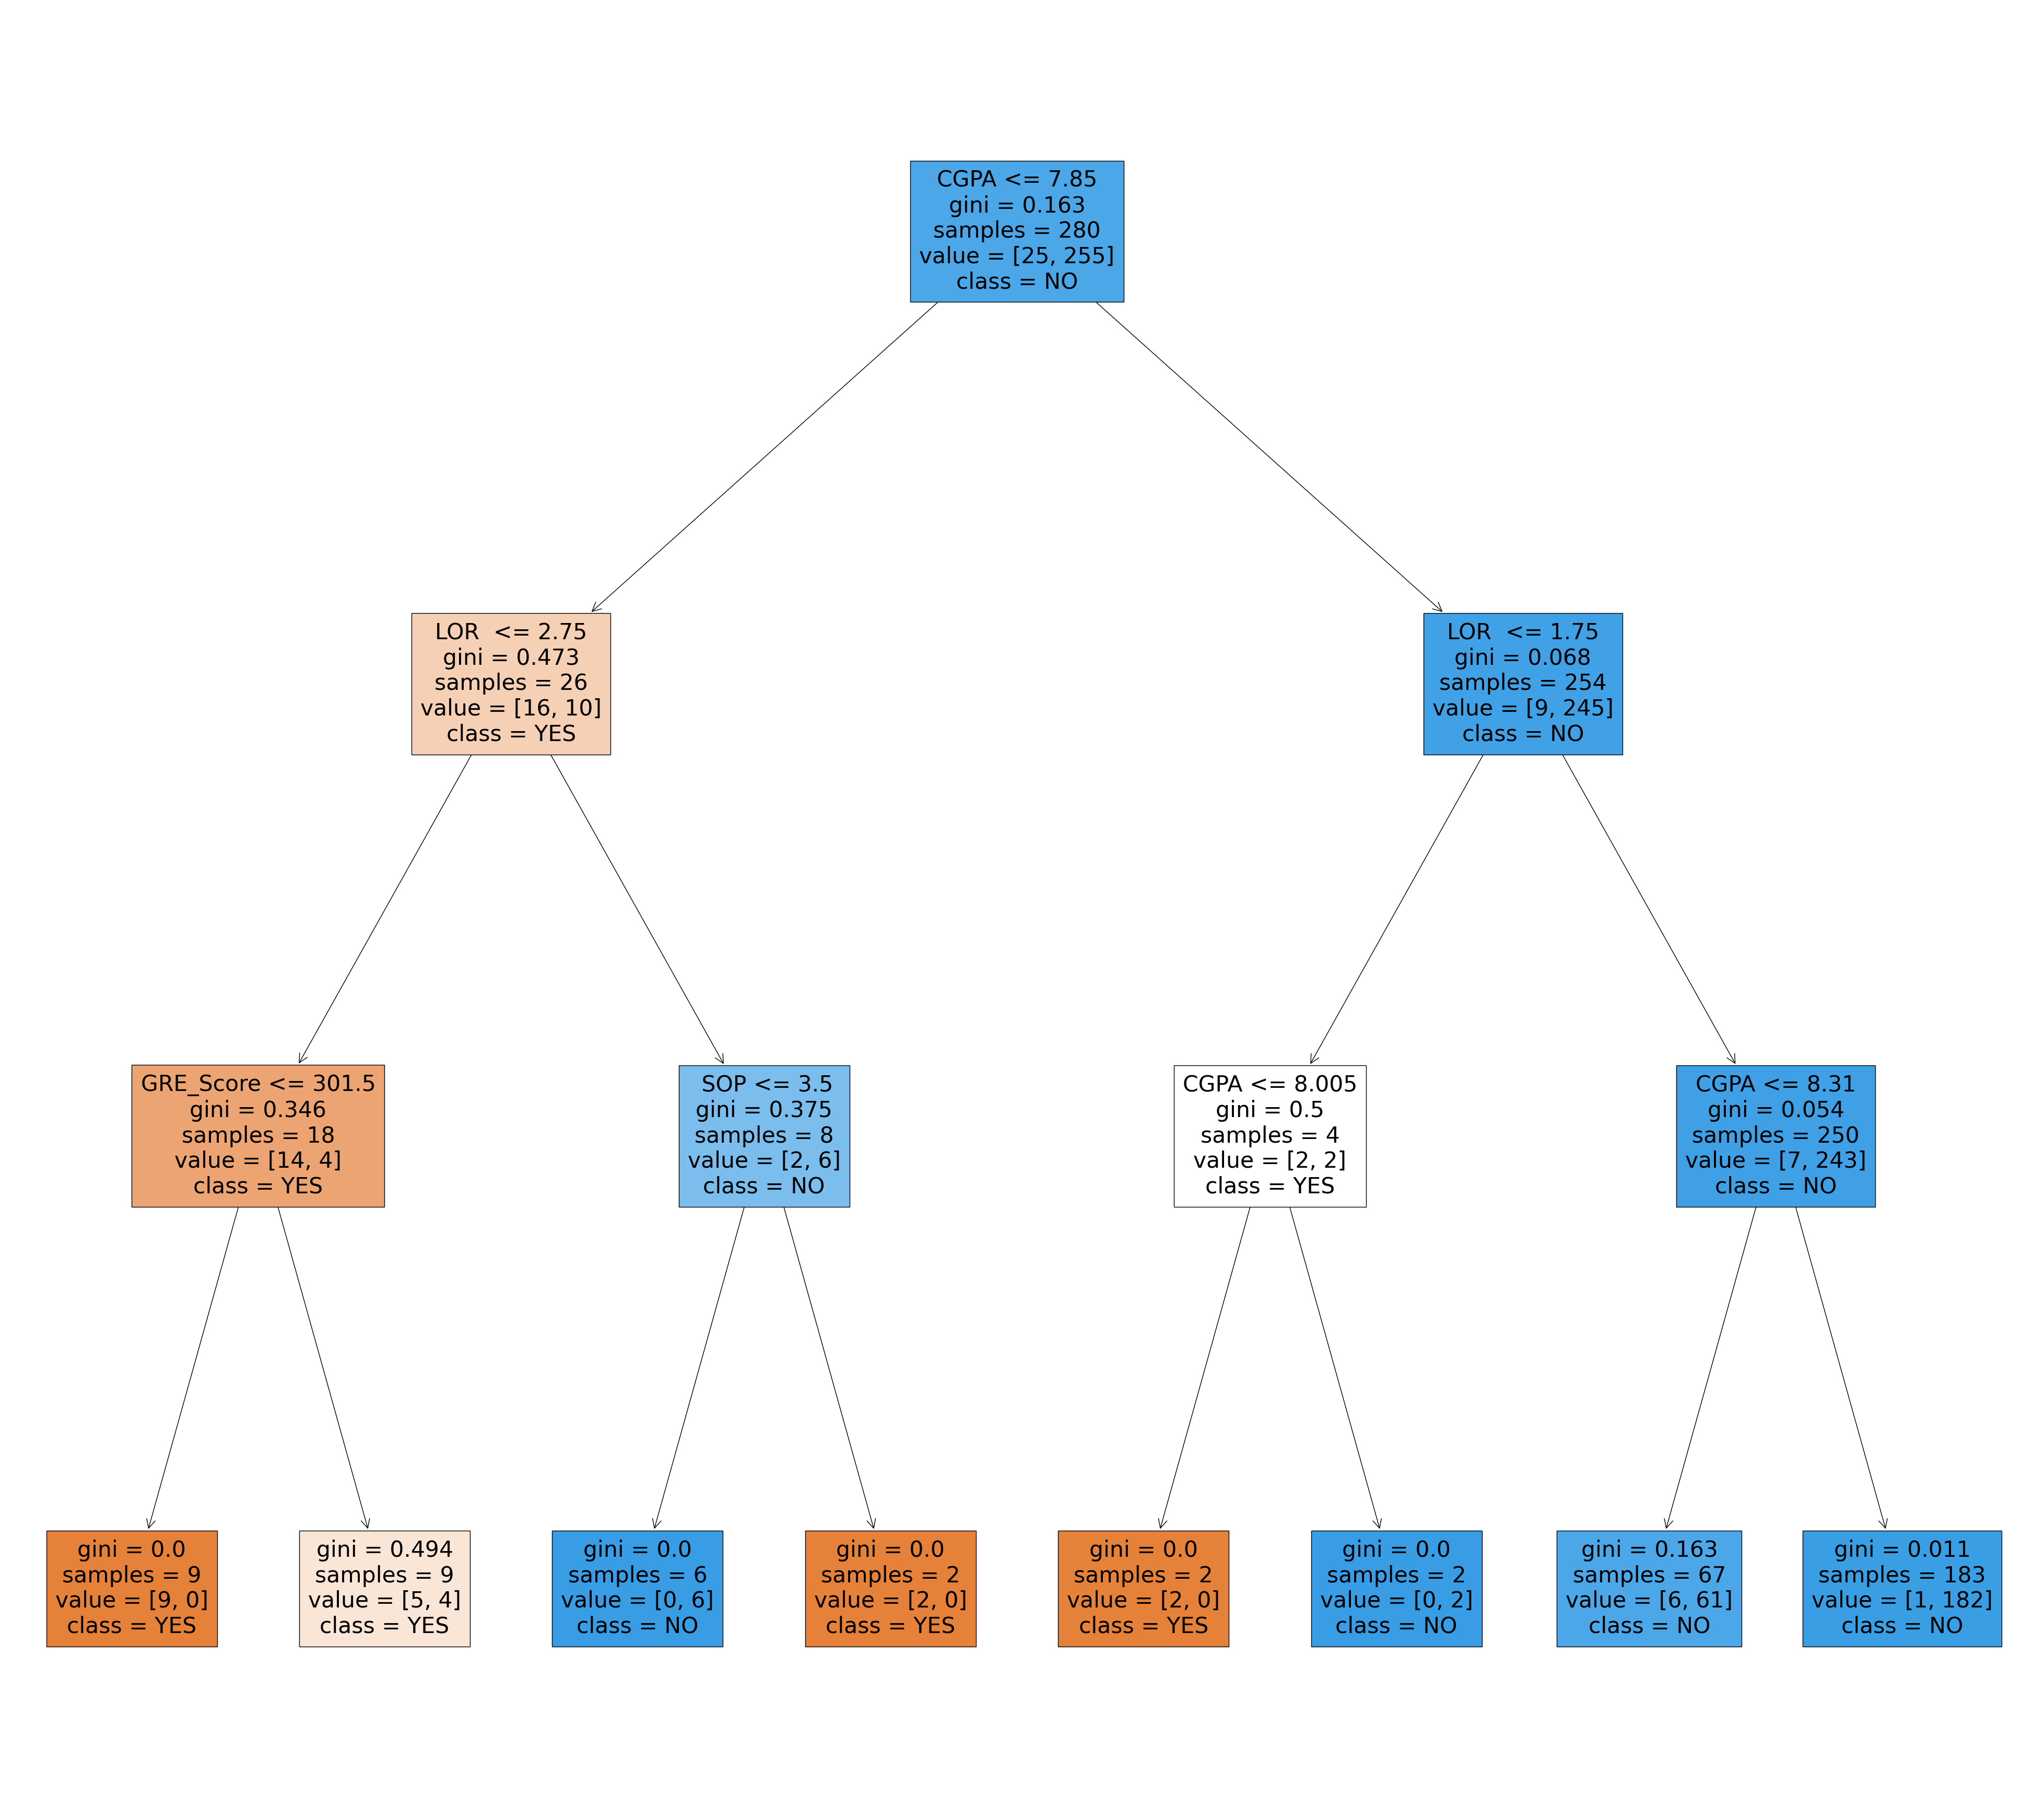

In [66]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel_ad_pruned, 
                   feature_names=list(X_ad.columns),  
                   class_names=Y_ad.value_counts().index,
                   filled=True)

# RANDOM FOREST
#### Create a classification model to predict Admit status using RandomForest. Include all the analysis steps including variable importance plot. Try at least 5 different values of n_estimators (number of trees) such as 10, 50, 100, 150, 200 and compare the classification accuracy for each of them. Pick the best model (based on n_estimators) for your final comparison. 
#### n_estimators means number of decision trees. we start from lower to higher number

A variable importance plot from a random forest model is a graphical representation that ranks the importance of each variable (or feature) in the prediction process of the model.

In [68]:
#Training the data on Random Forest, on 5 different values of n estimators (number of trees) such as 10, 50, 100, 150, 200

# rf_ad = RandomForestClassifier(n_estimators=100)
# rfmodel_ad = rf_ad.fit(X_ad_train, y_ad_train)

# #Checking it on Training set
# train_pred_ad = rfmodel_ad.predict(X_ad_train)
# acc_ad_rf1 = accuracy_score(train_pred_ad, y_ad_train)
# acc_ad_rf1*100

# #Checking it on the actual Testing Set
# test_pred_ad = rfmodel_ad.predict(X_ad_test)
# acc_ad_rf2 = accuracy_score(test_ad_pred, y_ad_test)
# acc_ad_rf2*100

# [acc_ad_rf1*100, acc_ad_rf2*100]

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# Define the list of n_estimators values
n_estimators_values = [10, 50, 100, 150, 200]

# Lists to store the accuracies
train_accuracies = []
test_accuracies = []

# Loop through each value of n_estimators
for n in n_estimators_values:
    # Initialize the RandomForestClassifier with the current n_estimators
    rf_ad = RandomForestClassifier(n_estimators=n, random_state = 99)
    
    # Fit the model on the training data
    rfmodel_ad = rf_ad.fit(X_ad_train, y_ad_train)
    
    # Predict on the training set and calculate accuracy
    train_pred_ad = rfmodel_ad.predict(X_ad_train)
    train_acc = accuracy_score(train_pred_ad, y_ad_train) * 100
    train_accuracies.append(train_acc)
    
    # Predict on the testing set and calculate accuracy
    test_pred_ad = rfmodel_ad.predict(X_ad_test)
    test_acc = accuracy_score(test_pred_ad, y_ad_test) * 100
    test_accuracies.append(test_acc)
    
    # Print the accuracy for each model
    print(f'n_estimators={n}: Training Accuracy = {train_acc:.2f}%, Testing Accuracy = {test_acc:.2f}%')


n_estimators=10: Training Accuracy = 100.00%, Testing Accuracy = 91.67%
n_estimators=50: Training Accuracy = 100.00%, Testing Accuracy = 94.17%
n_estimators=100: Training Accuracy = 100.00%, Testing Accuracy = 95.00%
n_estimators=150: Training Accuracy = 100.00%, Testing Accuracy = 95.83%
n_estimators=200: Training Accuracy = 100.00%, Testing Accuracy = 95.00%


### Interpretation 
Although one expect that we will get better testing accuracy when we were going 150 to 200, the testing accuracy instead decreases and that could be due to several reasons. While it is true that Random Forests perform predictions based on the majority vote from a set of decision trees. Increasing n_estimators improves stability, but after a certain point, adding more trees provides diminishing returns and can introduce slight variations. This happens because as you increase n_estimators, the model may start capturing tiny fluctuations that do not generalize well to new data. Although Random Forests are generally resistant to overfitting, very high values of n_estimators can still cause the model to “over-focus” on certain patterns in the training set, leading to a small drop in testing performance.
Thus, it seems our model reaches its optimal performance around n_estimators 150, beyond this, adding more trees captures fluctuations that do not generalize well to new data. 

Variance in Test Data Predictions; Random Forests perform predictions based on the majority vote from a set of decision trees. Increasing n_estimators improves stability, but after a certain point, adding more trees provides diminishing returns and can introduce slight variations. This happens because as you increase n_estimators, the model may start capturing tiny fluctuations that do not generalize well to new data.

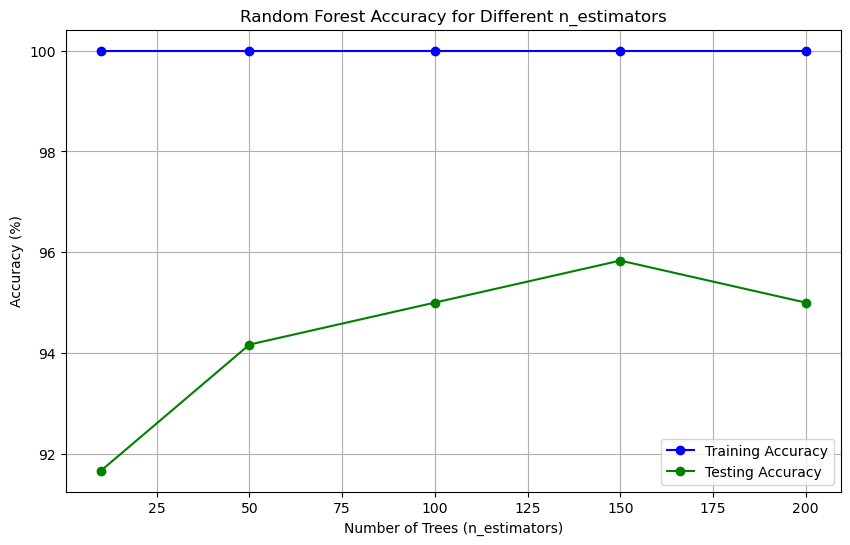


Best n_estimators based on Testing Accuracy: 150


In [70]:
# Plot training and testing accuracies for each n_estimators value
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, marker='o', label="Training Accuracy", color="blue")
plt.plot(n_estimators_values, test_accuracies, marker='o', label="Testing Accuracy", color="green")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy (%)")
plt.title("Random Forest Accuracy for Different n_estimators")
plt.legend()
plt.grid(True)
plt.show()

# Identify the best model based on highest testing accuracy
best_n = n_estimators_values[test_accuracies.index(max(test_accuracies))]
print(f"\nBest n_estimators based on Testing Accuracy: {best_n}")

In [71]:
# Retrain the model with the best n_estimators for feature importance analysis
best_rf = RandomForestClassifier(n_estimators=best_n, random_state = 99)
best_rf.fit(X_ad_train, y_ad_train)
best_rf.feature_importances_

array([0.18210298, 0.18976588, 0.05144062, 0.1038027 , 0.1140113 ,
       0.32376881, 0.01889515, 0.01621256])

Text(0.5, 0, 'Random Forest Feature Importance')

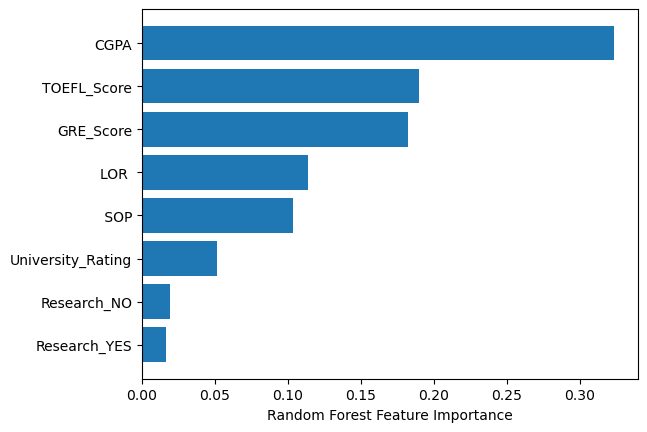

In [72]:
sorted_idx = best_rf.feature_importances_.argsort()
plt.barh(list(X_ad.columns[sorted_idx]), best_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Important Attrbutes
As can be observed from above, the most important attribute in determining "admit" is CGPA, and then TOEFL Score, Gre Score are lesser in importance e.t.c. 
This is pretty similar with our previous findings regarding decision trees very interestingly, and as we will see it later when we do "Cross Validation". As both models exhibit high accuracy when it came to prediction (although random forest) is higher, it makes sense that they will have give similar importance to certain attrbutes cause at the end of the day, they are largely accurate, meaning they atleast can identify which is the most important attribute!

### Cross Validation, to test the randomness in your data by picking random sets for testing

In [75]:
scores = [cross_val_score(best_rf, X_ad, Y_ad, cv=5), cross_val_score(dtmodel_ad_pruned, X_ad, Y_ad, cv=5)]
scores[0].mean(), scores[1].mean()

(0.925, 0.9125)

In [76]:
cm_ad_rf = confusion_matrix(y_ad_test,test_pred_ad)
cp_ad_rf = ConfusionMatrixDisplay(cm_ad_rf,display_labels=best_rf.classes_)
cm_ad_rf

array([[  5,   5],
       [  1, 109]], dtype=int64)

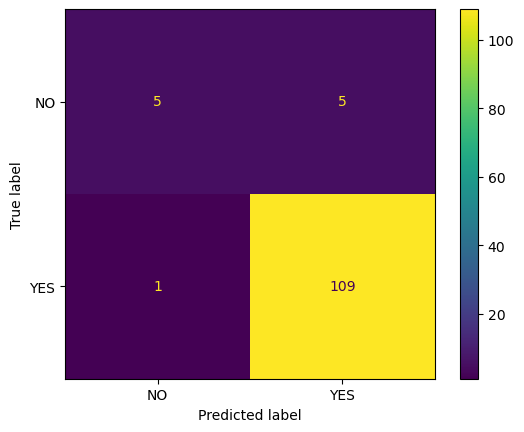

In [77]:
cp_ad_rf.plot()

In [78]:
cm_ad_d = confusion_matrix(y_ad_test,test_ad_pred_test)
cp_rf_d = ConfusionMatrixDisplay(cm_ad_d,display_labels=dtmodel_ad_pruned.classes_)
cm_ad_d
# cp_rf_d.plot()

array([[  5,   5],
       [  3, 107]], dtype=int64)

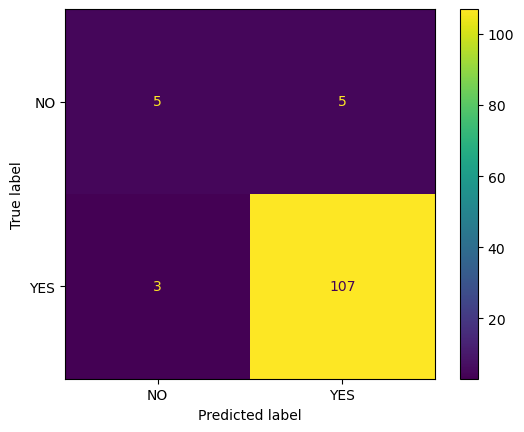

In [79]:
cp_rf_d.plot()

### Interpretation
With the Random Forest (Confusion Matrix 1), the model performs slightly better, showing fewer False Negatives (1 vs. 3). This means it correctly identifies more positive cases, resulting in higher recall. However, the False Positives remain the same. The Pruned Decision Tree (Confusion Matrix 2) has more False Negatives, which indicates slightly lower sensitivity. Overall, the Random Forest model demonstrates slightly better performance in accurately predicting true positive cases.

# Recommendation using burger-king-menu-2.csv 
#### Build a decision tree to recommend similar food based on their attributes. Interpret your decision tree and tell some interesting insights from it. You do not (necessarily) need to pick all the food (rows) and attributes (columns). Pick 1 category (Burgers, Chicken or Breakfast) of your choice and explain/interpret your recommendations. 

##### Note: After you filter your data based on Category, you need to remove Category column from the data and then create a decision tree. Use Item column as your class/label (Y) 

In [82]:
#I have already read the file, seeing what it contains
df_bor.head() 

Item Category  Calories  Fat Calories  \
0                     Whopper® Sandwich  Burgers       660           360   
1         Whopper® Sandwich with Cheese  Burgers       740           420   
2      Bacon & Cheese Whopper® Sandwich  Burgers       790           460   
3              Double Whopper® Sandwich  Burgers       900           520   
4  Double Whopper® Sandwich with Cheese  Burgers       980           580   

   Fat (g)  Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0     40.0               12.0            1.5                90          980   
1     46.0               16.0            2.0               115         1340   
2     51.0               17.0            2.0               125         1560   
3     58.0               20.0            3.0               175         1050   
4     64.0               24.0            3.0               195         1410   

   Total Carb (g)  Dietary Fiber (g)  Sugars (g)  Protein (g)  
0              49                  2          11           28  
1              50                  2          11           32  
2              50                  2          11           35  
3              49                  2          11           48  
4              50                  2          11           52

#### Filtering for the "Burgers" category

In [84]:
# Filter for the "Burgers" category
df_bor_only = df_bor[df_bor['Category'] == 'Burgers']

In [85]:
df_bor_only.head()

Item Category  Calories  Fat Calories  \
0                     Whopper® Sandwich  Burgers       660           360   
1         Whopper® Sandwich with Cheese  Burgers       740           420   
2      Bacon & Cheese Whopper® Sandwich  Burgers       790           460   
3              Double Whopper® Sandwich  Burgers       900           520   
4  Double Whopper® Sandwich with Cheese  Burgers       980           580   

   Fat (g)  Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  \
0     40.0               12.0            1.5                90          980   
1     46.0               16.0            2.0               115         1340   
2     51.0               17.0            2.0               125         1560   
3     58.0               20.0            3.0               175         1050   
4     64.0               24.0            3.0               195         1410   

   Total Carb (g)  Dietary Fiber (g)  Sugars (g)  Protein (g)  
0              49                  2          11           28  
1              50                  2          11           32  
2              50                  2          11           35  
3              49                  2          11           48  
4              50                  2          11           52

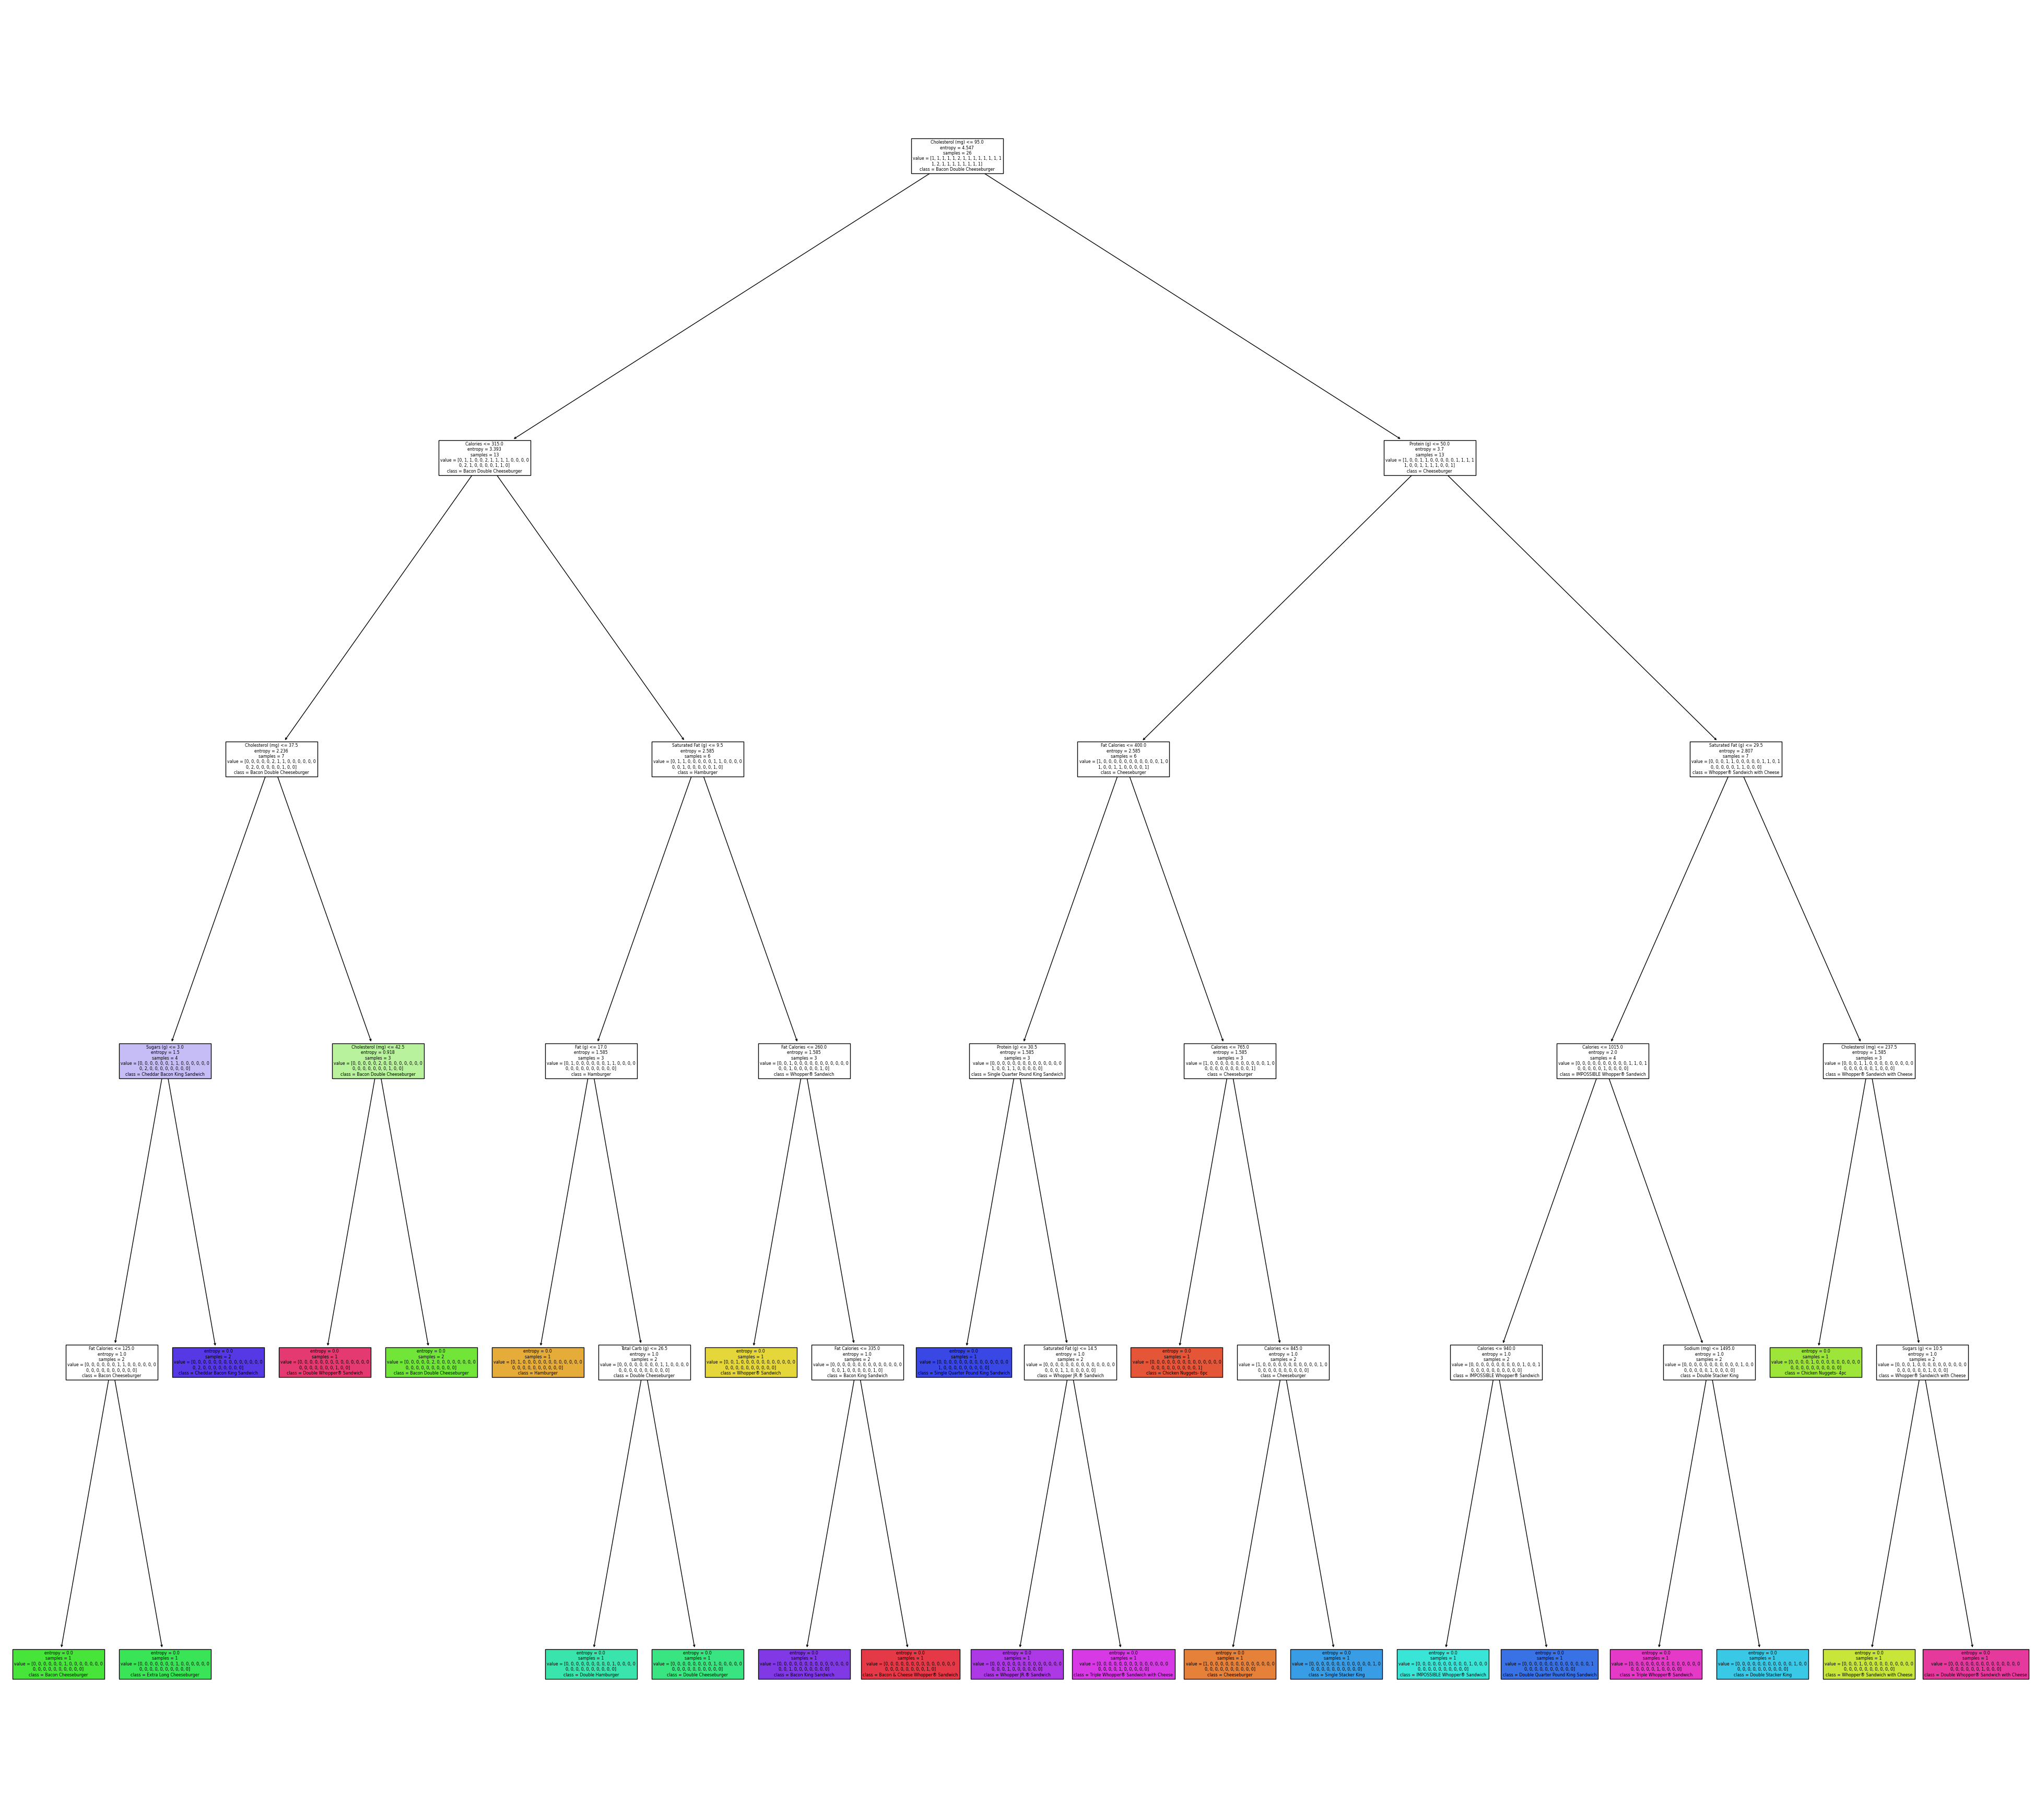

In [86]:
# Set up the features (X) and the target (Y)
X_bor = df_bor_only.drop(['Category', 'Item'], axis=1)  # Remove 'Category' and 'Item' from features
Y_bor = df_bor_only['Item']  # Set 'Item' as the label
dt_borg_only = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=1,random_state=99)
dt_borg_only_model = dt_borg_only.fit(X_bor, Y_bor)

fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dt_borg_only_model, 
                   feature_names=list(X_bor.columns),  
                   class_names=Y_bor.value_counts().index,
                   filled=True)

In [87]:
# Export the decision tree to text form 
tree_text = export_text(dt_borg_only_model, feature_names=list(X_bor.columns))
print(tree_text)

|--- Cholesterol (mg) <= 95.00
|   |--- Calories <= 315.00
|   |   |--- Cholesterol (mg) <= 37.50
|   |   |   |--- Sugars (g) <= 3.00
|   |   |   |   |--- Fat Calories <= 125.00
|   |   |   |   |   |--- class: Chicken Nuggets- 4pc
|   |   |   |   |--- Fat Calories >  125.00
|   |   |   |   |   |--- class: Chicken Nuggets- 6pc
|   |   |   |--- Sugars (g) >  3.00
|   |   |   |   |--- class: Hamburger
|   |   |--- Cholesterol (mg) >  37.50
|   |   |   |--- Cholesterol (mg) <= 42.50
|   |   |   |   |--- class: Whopper JR.® Sandwich
|   |   |   |--- Cholesterol (mg) >  42.50
|   |   |   |   |--- class: Cheeseburger
|   |--- Calories >  315.00
|   |   |--- Saturated Fat (g) <= 9.50
|   |   |   |--- Fat (g) <= 17.00
|   |   |   |   |--- class: Bacon Cheeseburger
|   |   |   |--- Fat (g) >  17.00
|   |   |   |   |--- Total Carb (g) <= 26.50
|   |   |   |   |   |--- class: Double Hamburger
|   |   |   |   |--- Total Carb (g) >  26.50
|   |   |   |   |   |--- class: Double Cheeseburger
|   |   |

In [88]:
fig.savefig("borgor_decision_tree.png")

This decision tree categorizes Burger King "Burgers" by attributes like cholesterol, calories, fat, and protein to recommend similar food items. 

**Low-cholesterol items** (≤ 95 mg), like "Chicken Nuggets" and "Hamburger", fall under simpler options with fewer calories and lower fat, while burgers with **higher cholesterol** (> 95 mg) tend to be more substantial, including "Whopper® Sandwich with Cheese" and "Bacon & Cheese Whopper® Sandwich".

**High-calorie, high-protein items** are mainly found in the lower branches of the tree, with recommendations like "Double Whopper® Sandwich" and "Double Stacker King"—both featuring elevated levels of sodium and saturated fat for a more indulgent meal. The tree also identifies specialty items like the "IMPOSSIBLE Whopper®", a lower-fat alternative compared to traditional beef Whoppers.

**Insights**: For lower-calorie choices, items like Whopper JR.® Sandwich or Hamburger are ideal, while high-calorie seekers might prefer the Double Whopper® Sandwich or Double Quarter Pound King Sandwich for a protein-dense meal. 

This decision tree effectively matches specific customer preferences to nutritional profiles within the Burger King menu.

# THANK YOU 

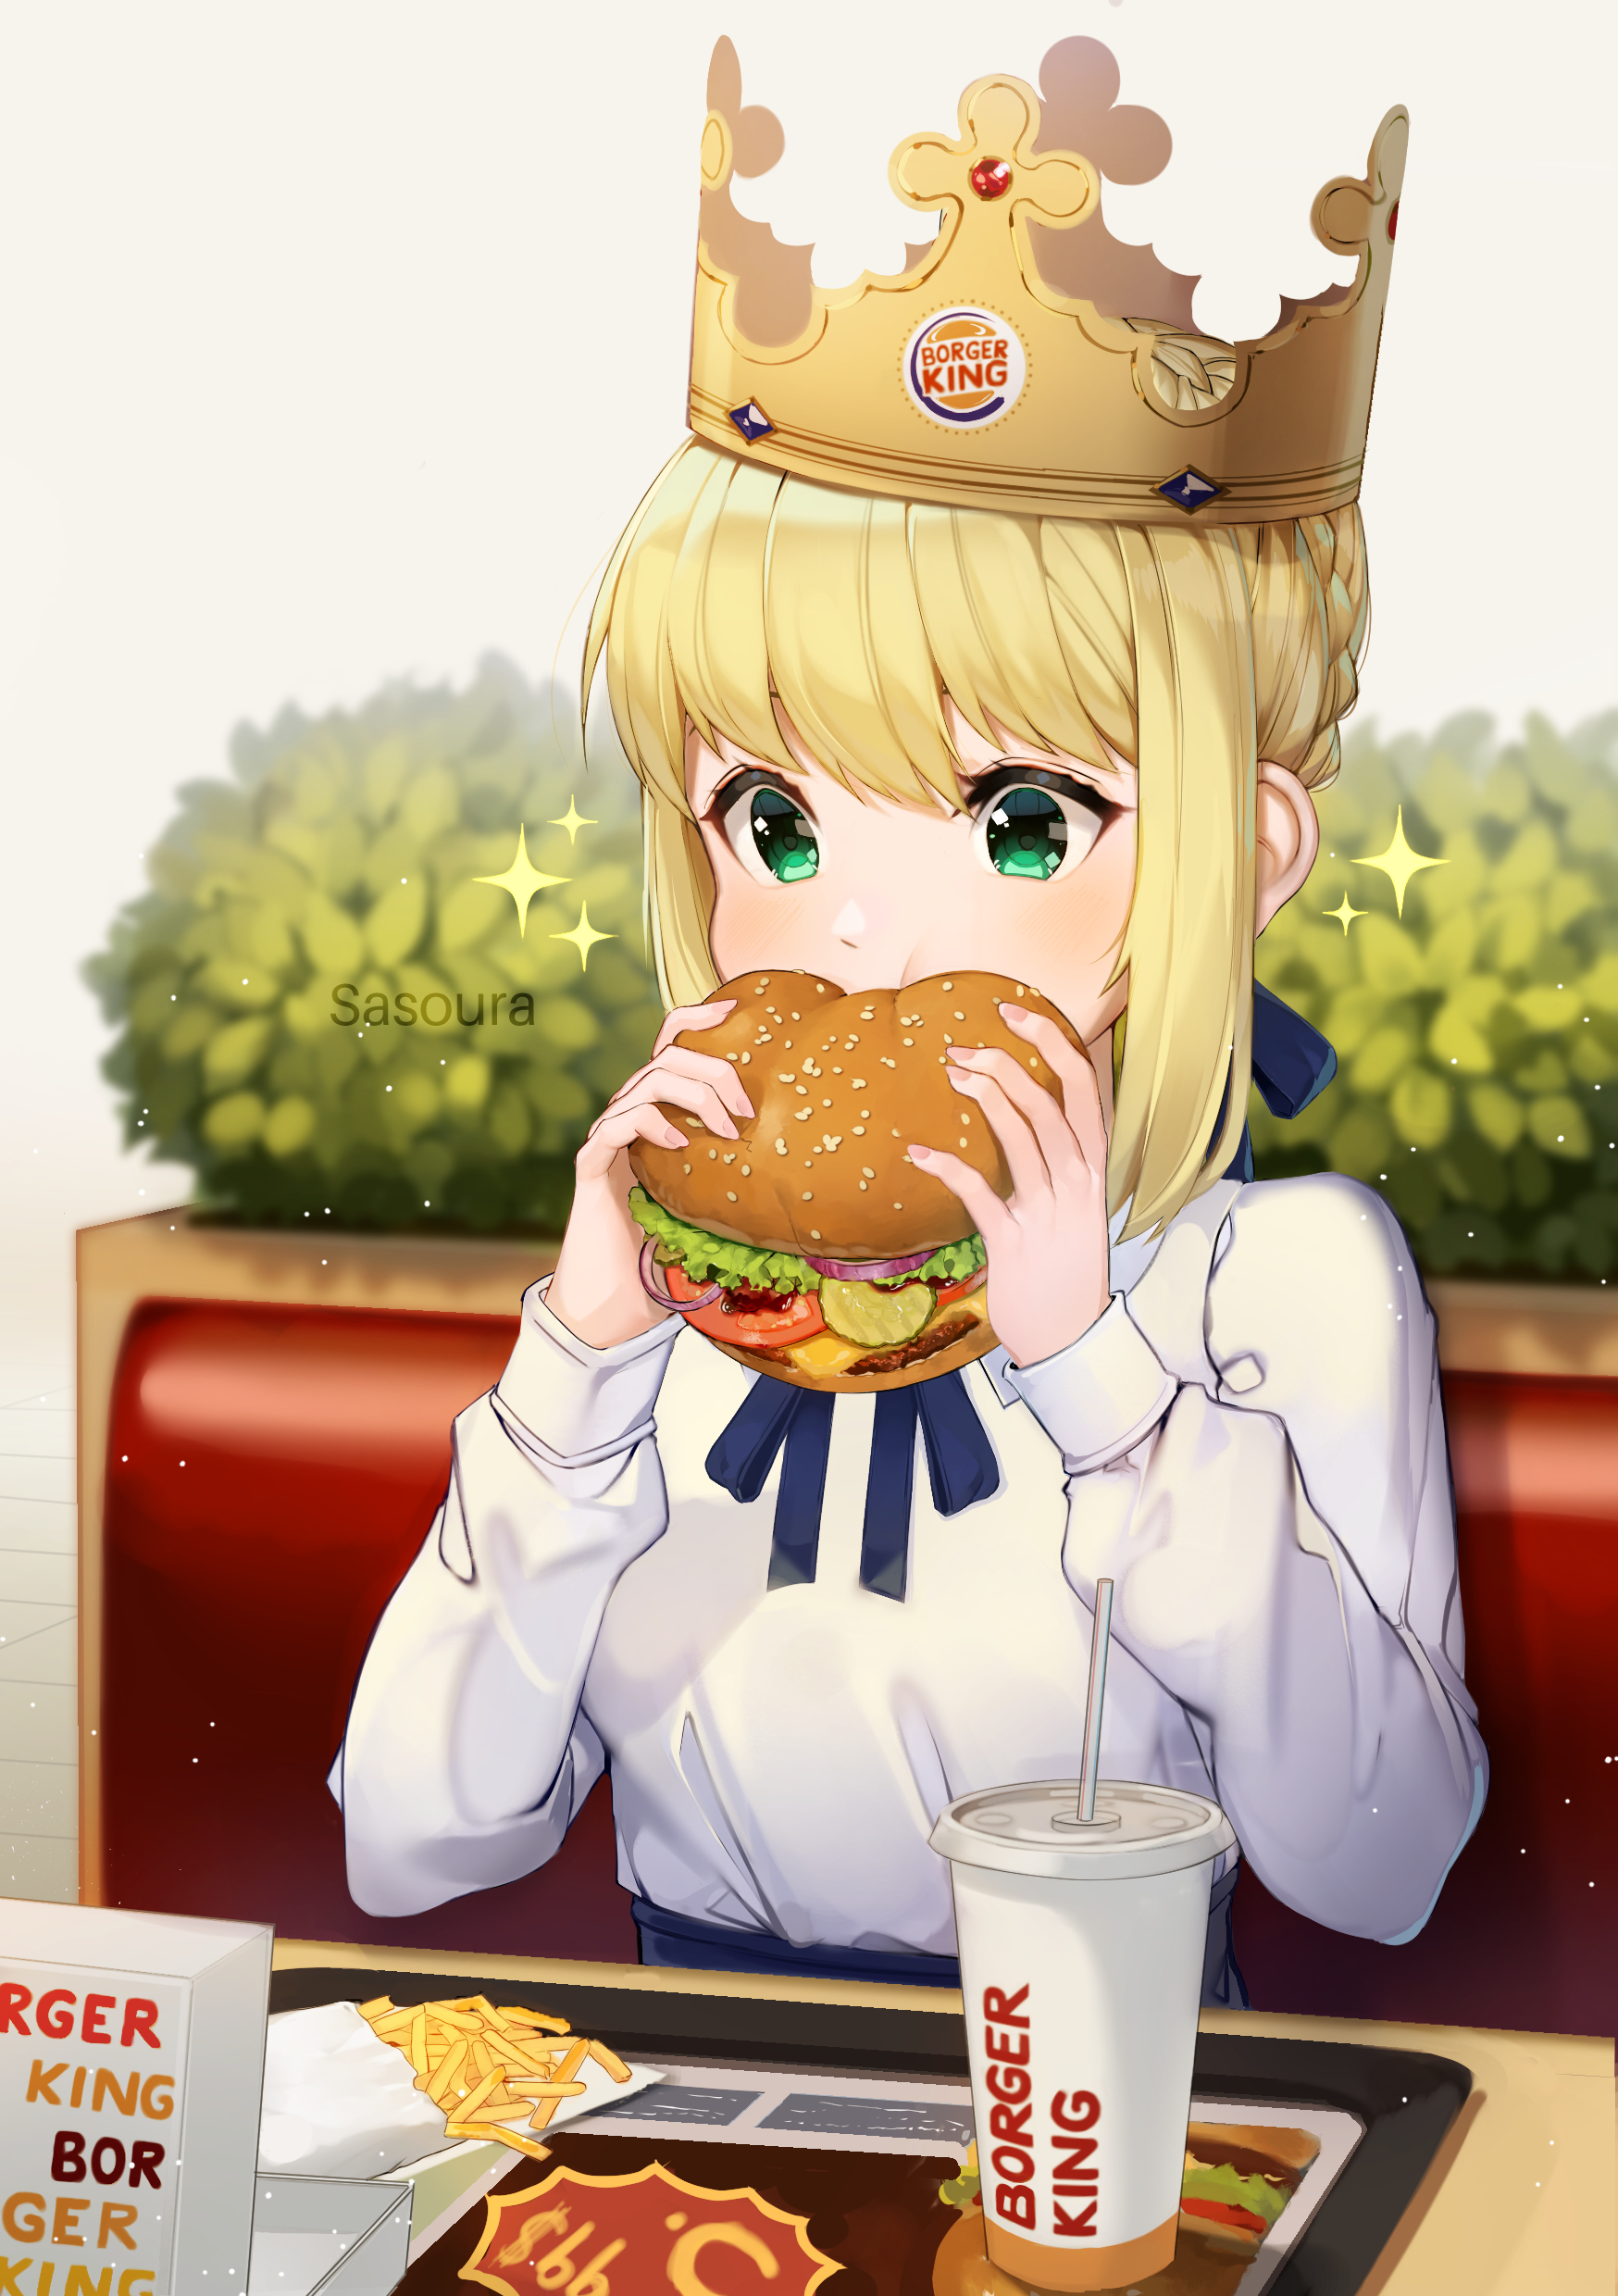

In [91]:
from IPython.display import Image, display

# Load and display image
image_path = 'BORGOR_KING_SABER.jpg'  # Make sure the image is in the same directory as your notebook
display(Image(filename=image_path,width=300))

Above Saber fan-art credit: https://x.com/Sasouraaaa/status/1275164083969458177